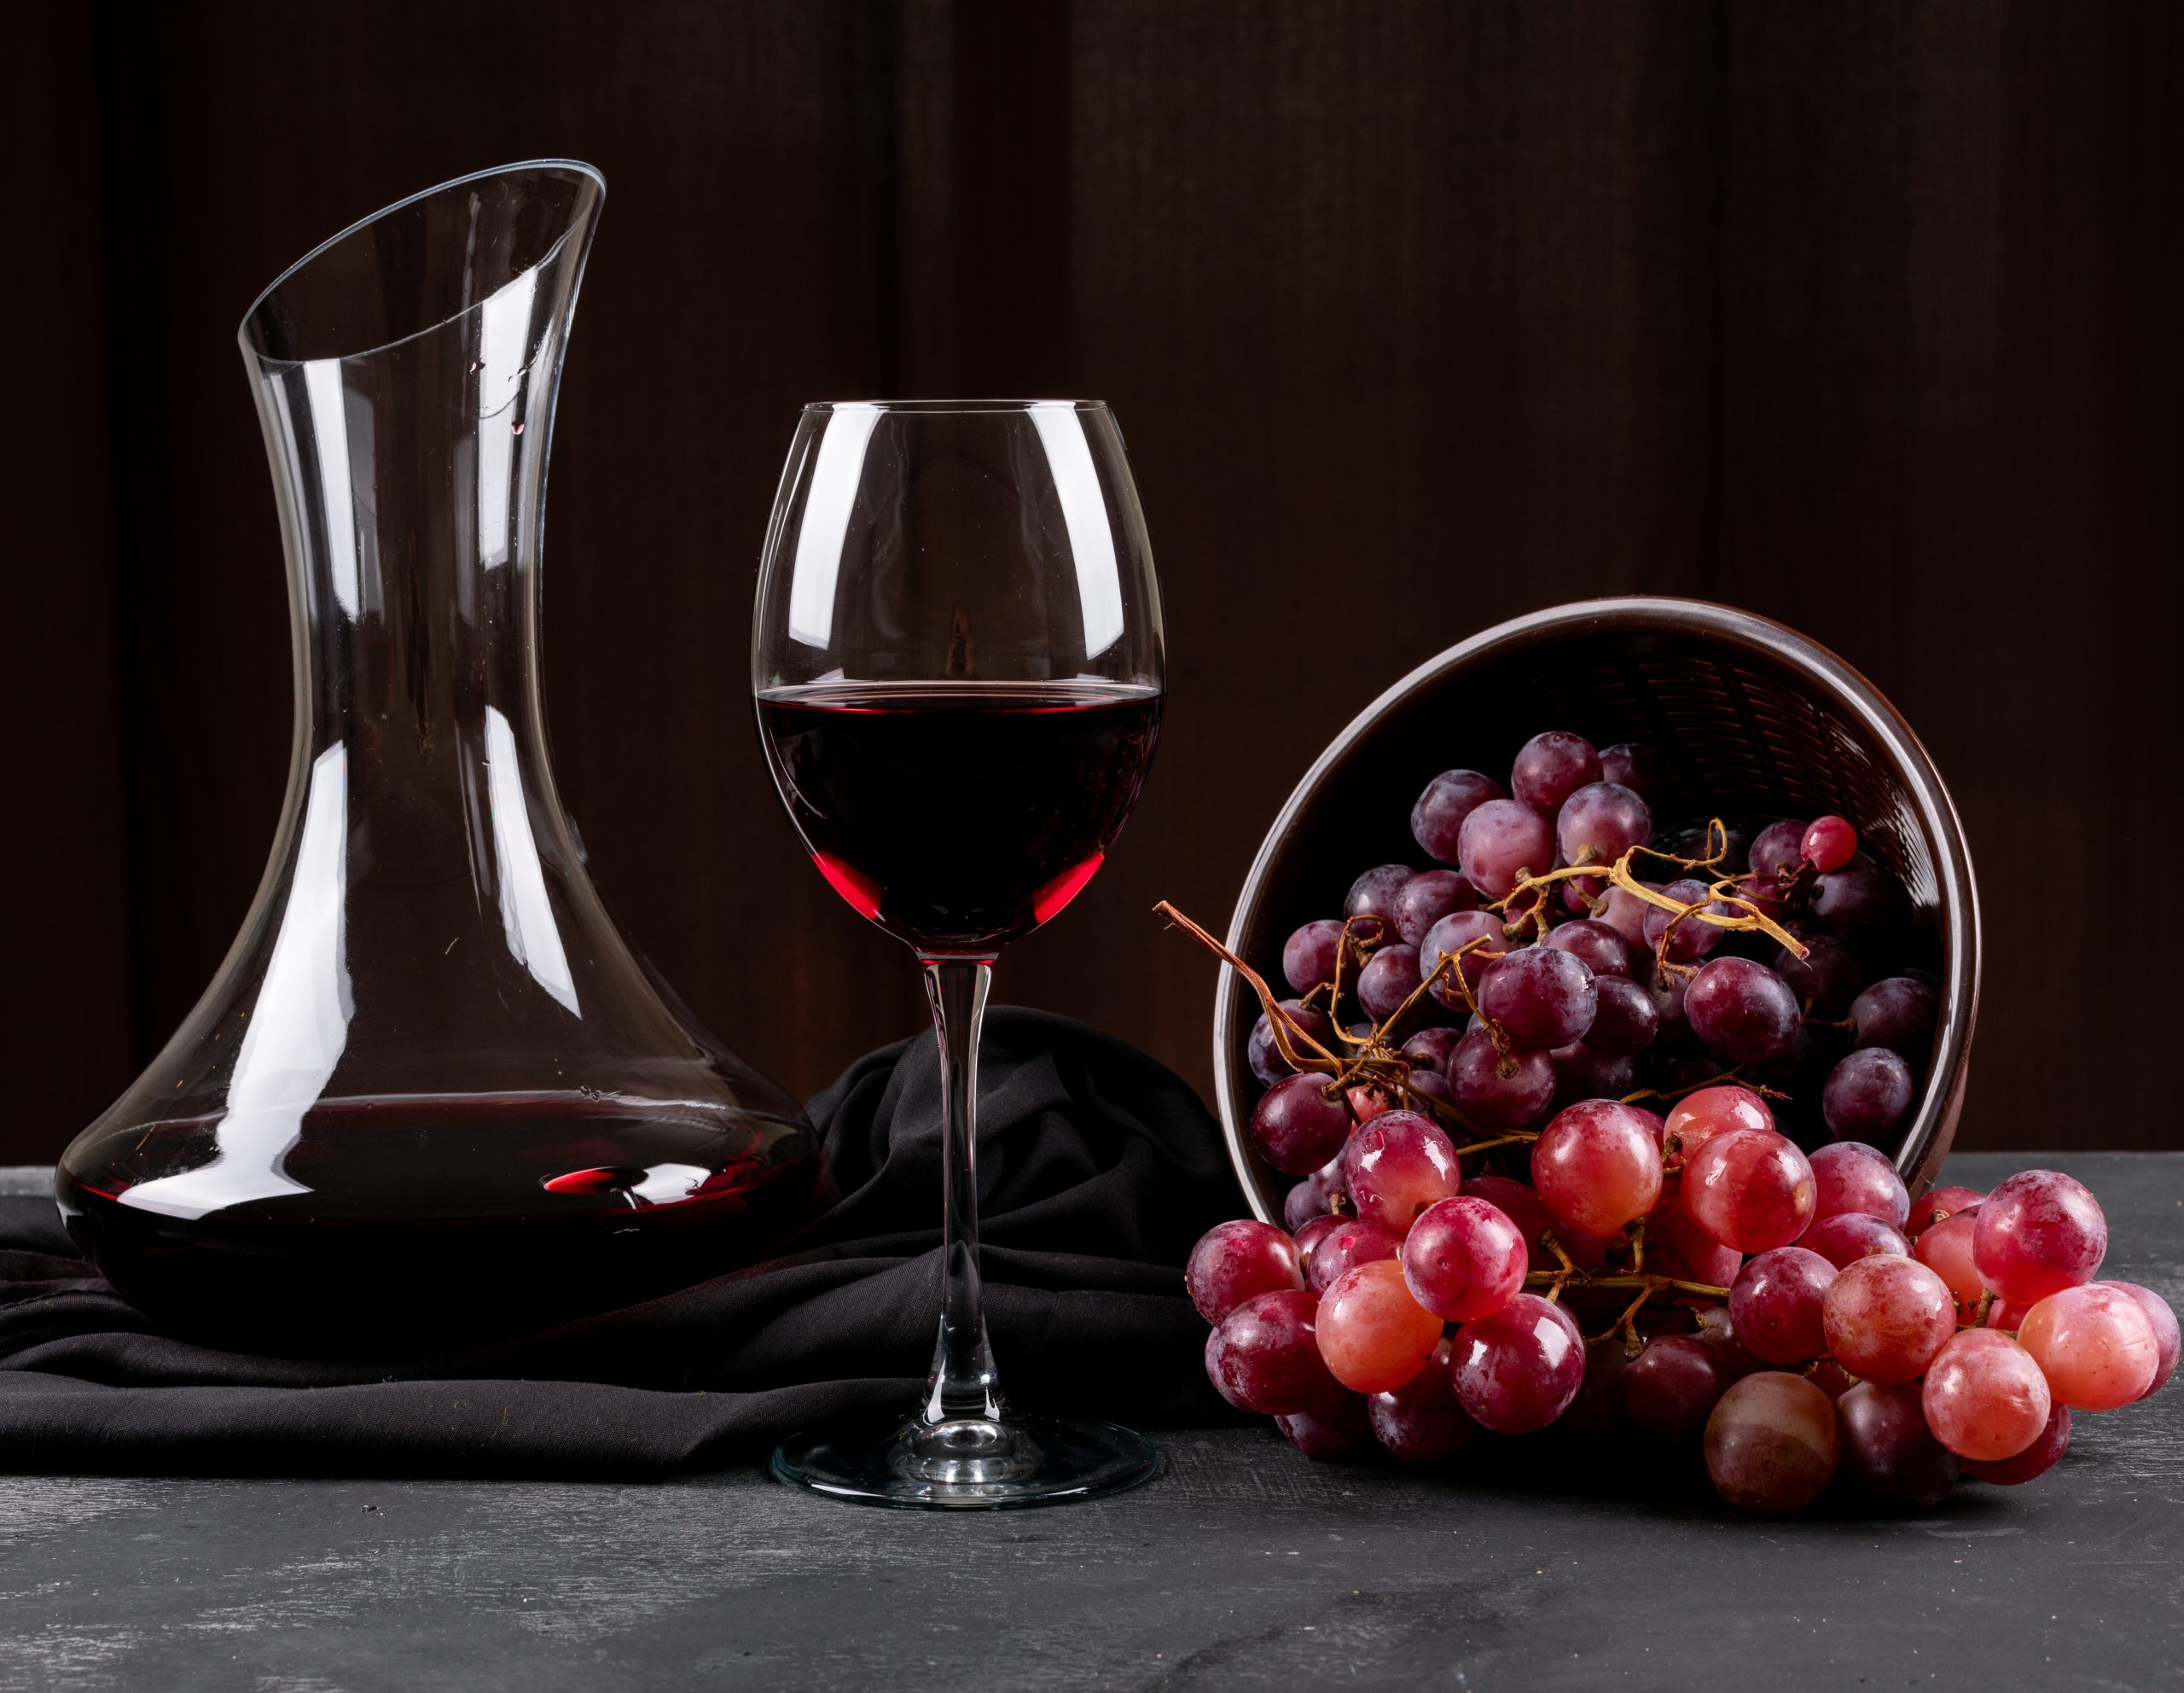

**Importing the Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore"),
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**Loading the Dataset**

In [2]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**EDA**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
df.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

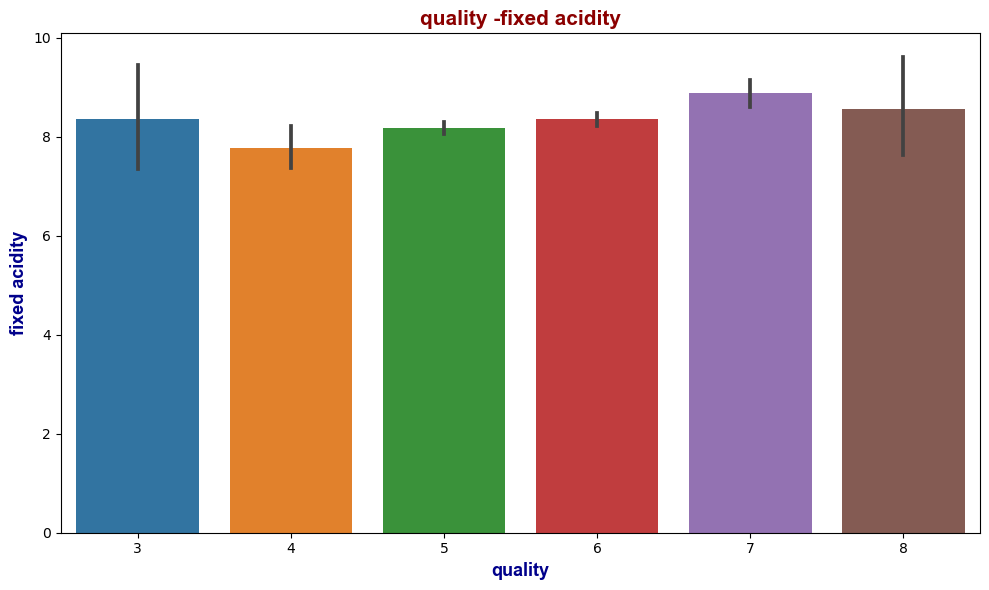

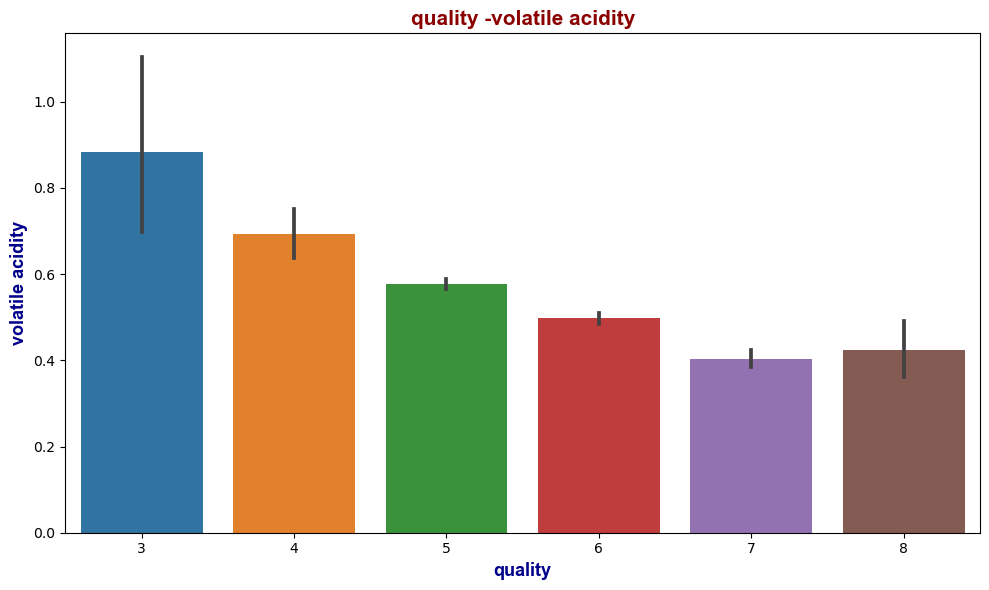

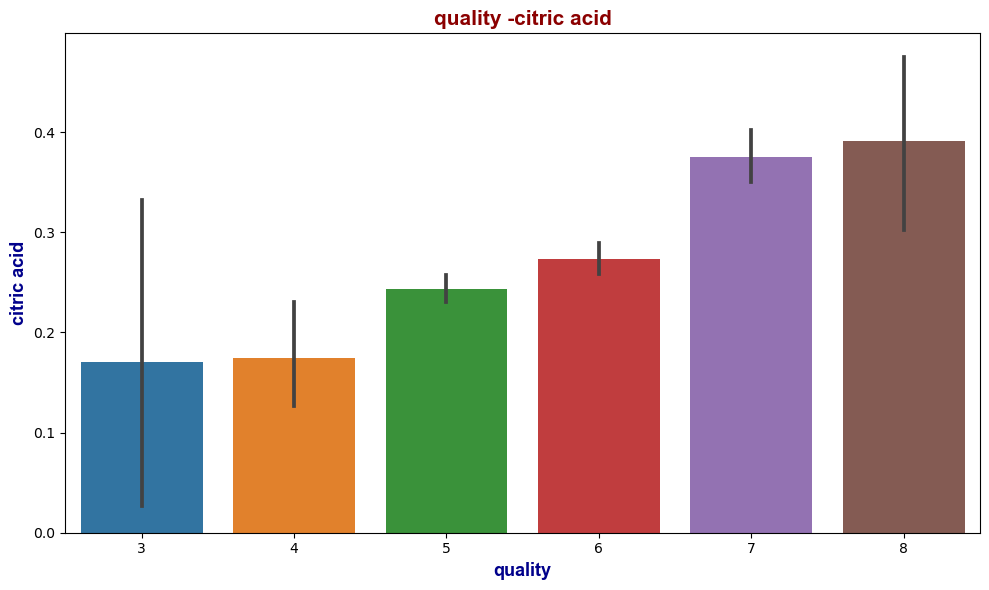

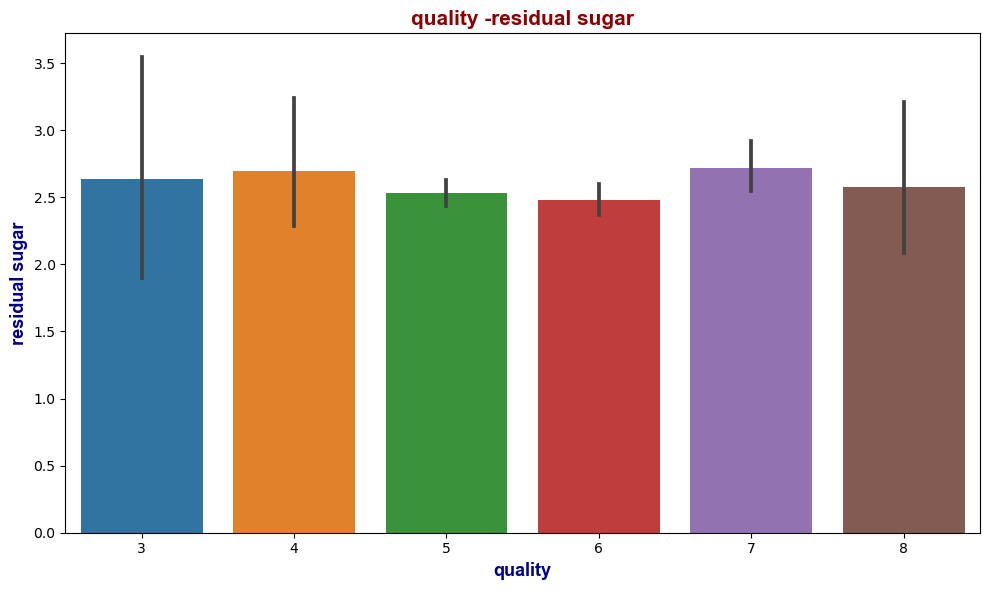

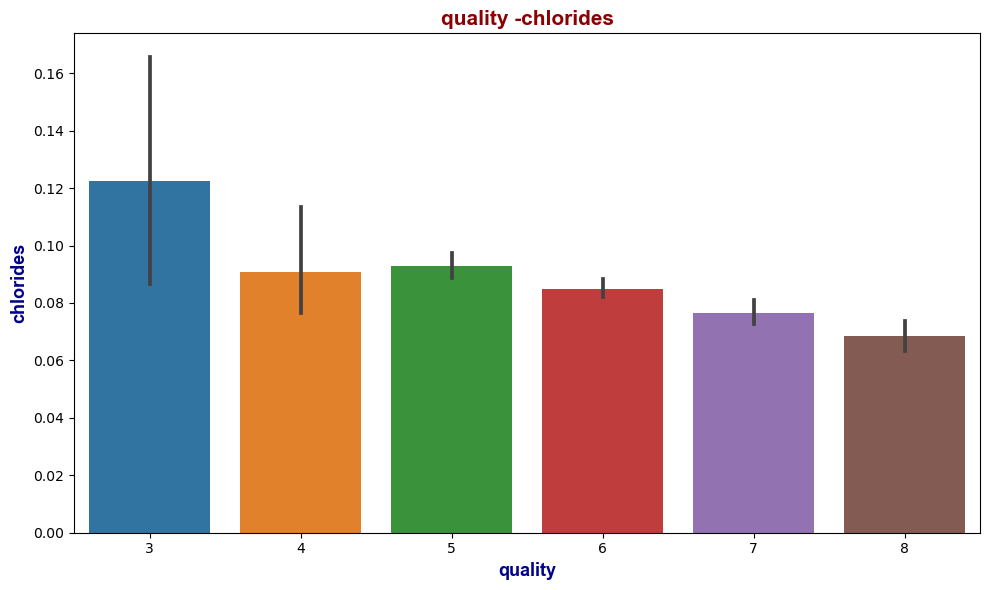

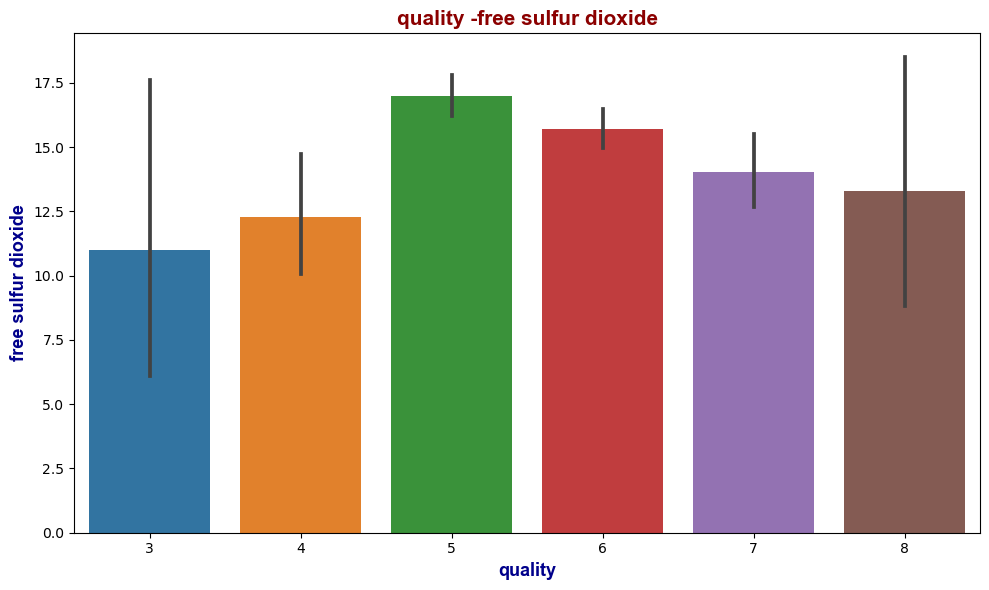

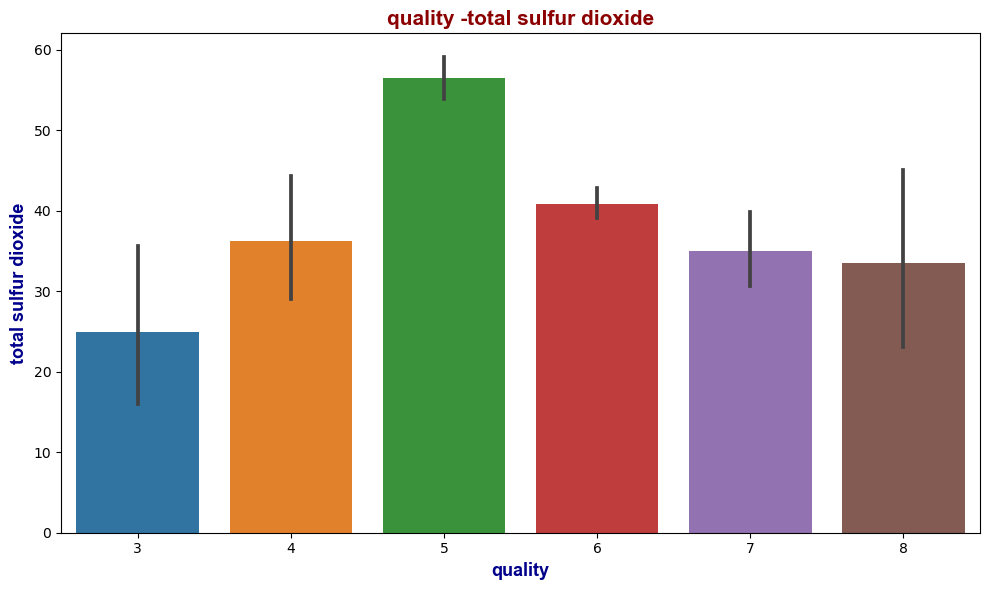

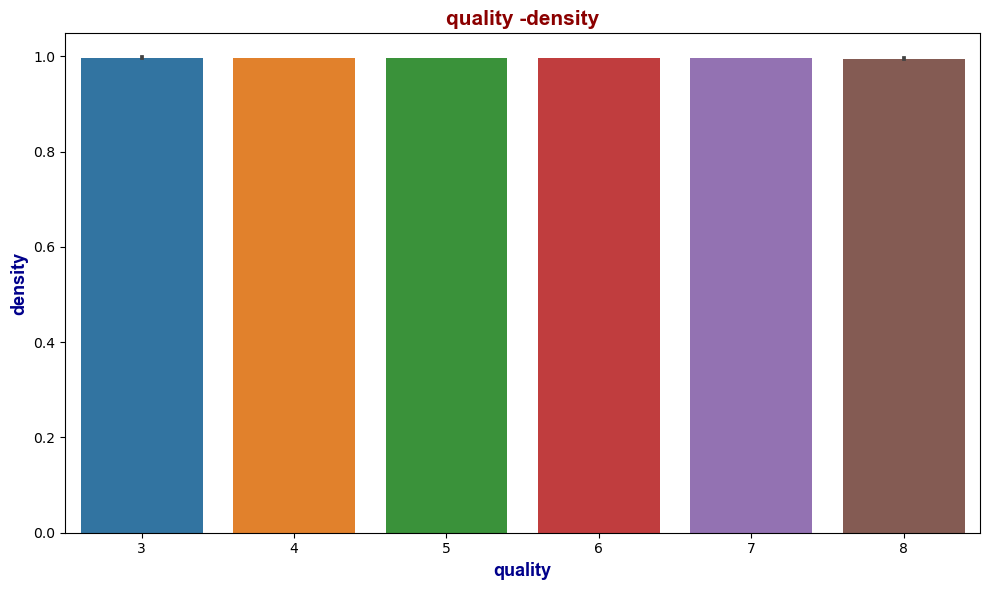

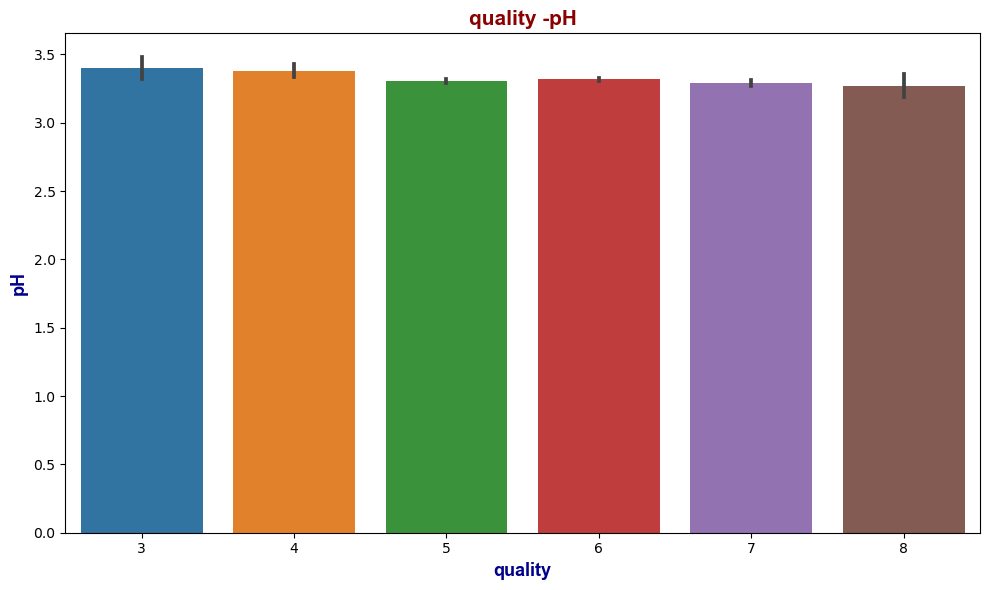

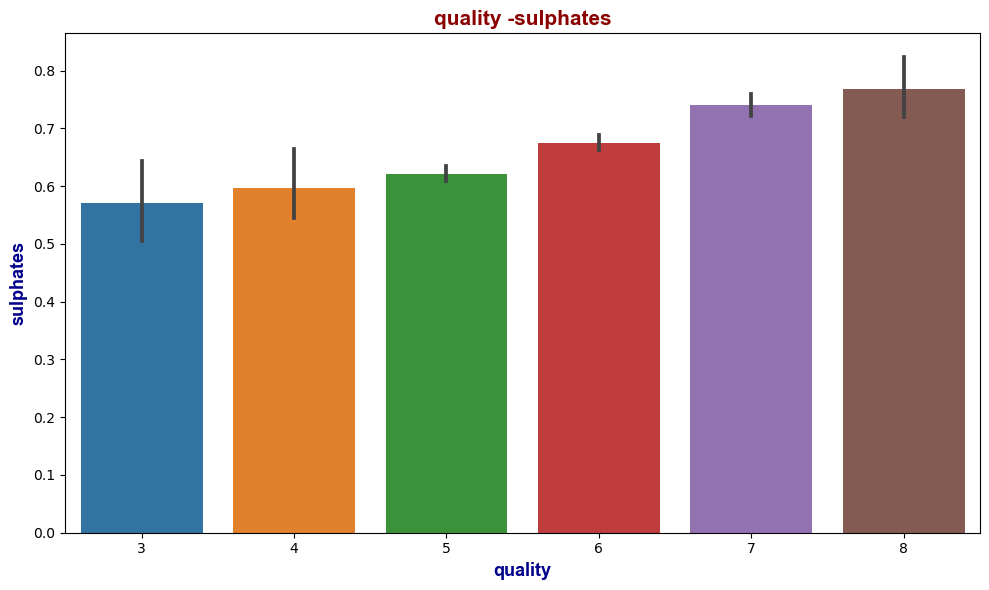

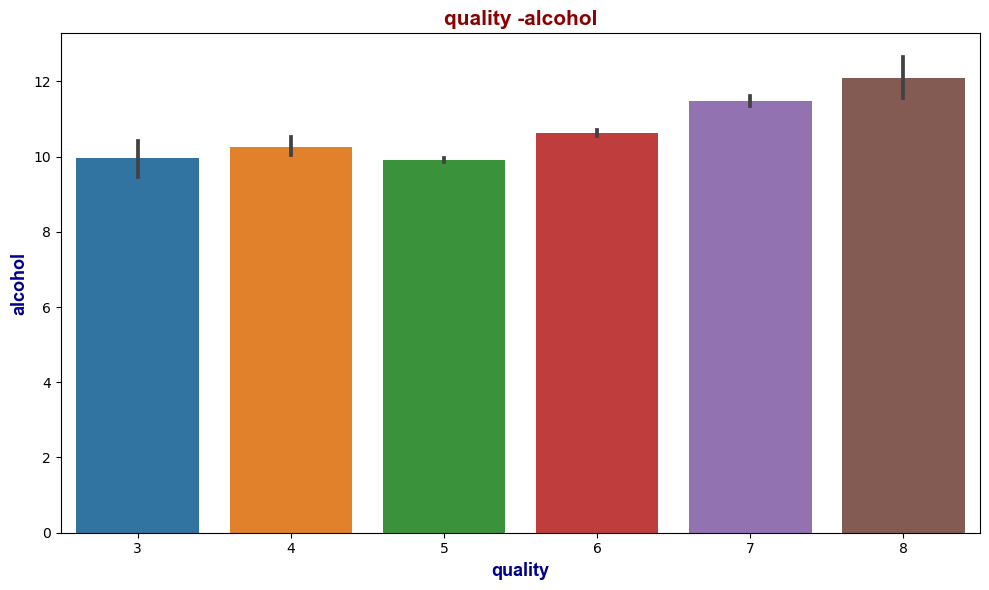

In [6]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i in df.columns[:-1]:
    plt.figure(figsize = (10,6))
    sns.barplot(x = 'quality', y = i, data = df)
        
    plt.title("quality -" + i , fontdict = title_font)
    plt.xlabel("quality", fontdict = axis_font)
    plt.ylabel(i, fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

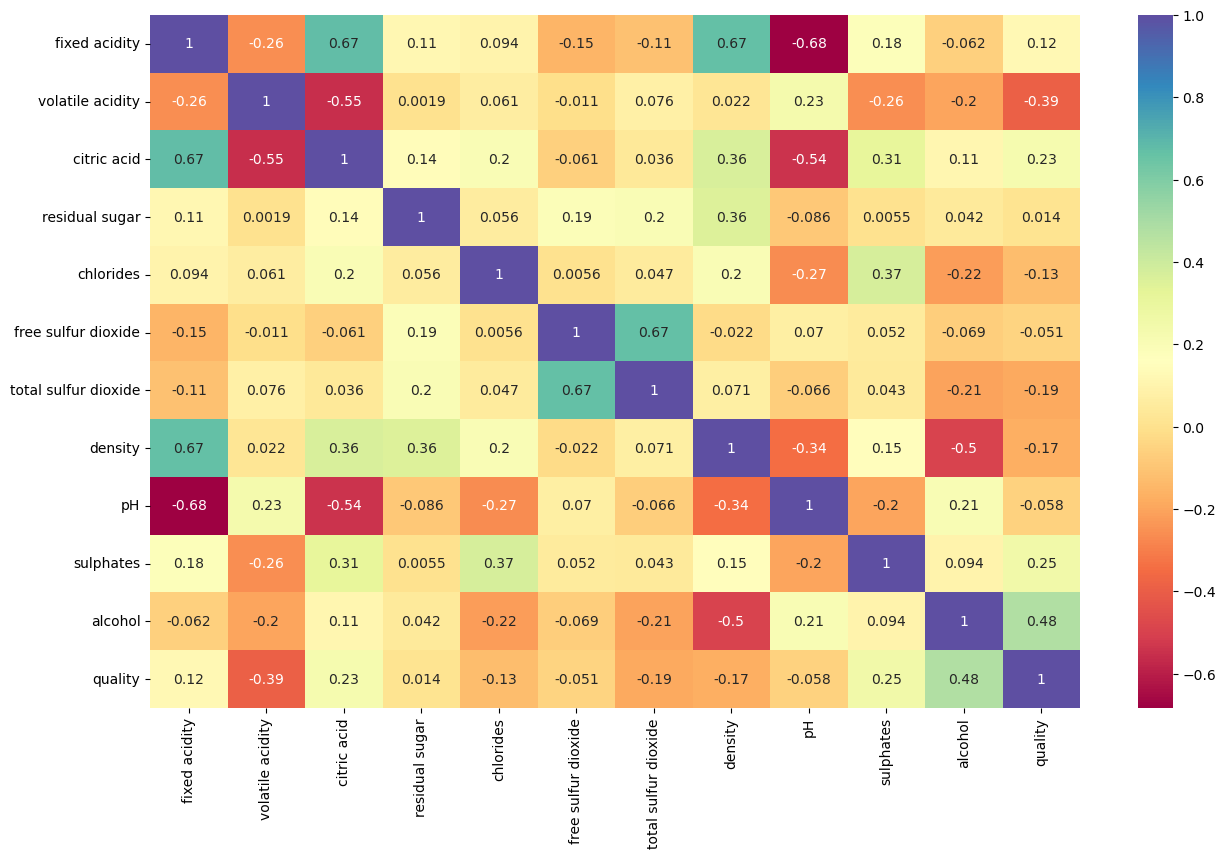

In [7]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), cmap='Spectral', annot = True);

**Preparation for modelling**

In [8]:
df.drop(["residual sugar", "free sulfur dioxide", "pH"], axis = 1, inplace = True)

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


In [10]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,bad
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,bad
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,bad
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,bad
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,bad


<Axes: xlabel='quality', ylabel='count'>

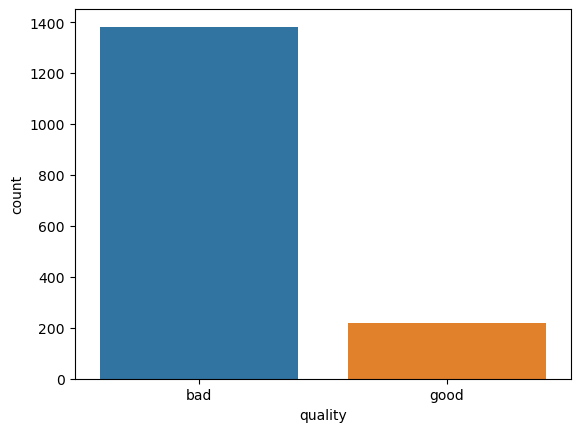

In [14]:
sns.countplot(df , x = df["quality"])

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
new_quality = LabelEncoder()

In [17]:
df['quality'] = new_quality.fit_transform(df['quality'])

In [18]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,0
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,0
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,0
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,0
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,0


In [19]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [20]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Scaling**

In [22]:
scaler = StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**SVC Modelling**

In [25]:
from sklearn.svm import SVC

In [26]:
svc_model = SVC()

In [27]:
svc_model.fit(X_train, y_train)

SVC()

In [30]:
y_pred = svc_model.predict(X_test)

In [31]:
cv_scores = cross_val_score(estimator=svc_model, X = X_train, y = y_train, cv=10)
cv_scores.mean()

0.8897699311023622

Text(0.5, 23.52222222222222, 'Predicted Label')

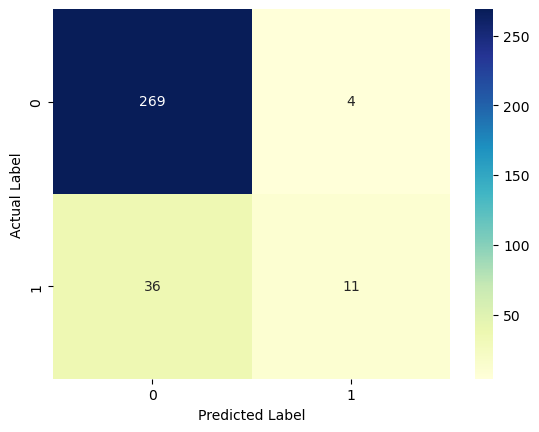

In [34]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       273
           1       0.73      0.23      0.35        47

    accuracy                           0.88       320
   macro avg       0.81      0.61      0.64       320
weighted avg       0.86      0.88      0.85       320



**Hyperparameter Optimization with Python**

In [36]:
svc_model2 = SVC()

In [37]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['poly', 'rbf']} 

In [38]:
svc_cv_model = GridSearchCV(estimator = svc_model2, param_grid = param_grid, cv = 10)

In [39]:
svc_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['poly', 'rbf']})

In [40]:
svc_cv_model.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [41]:
svc_tuned = SVC(C = 1, gamma = 1, kernel = "rbf")

In [42]:
svc_tuned.fit(X_train, y_train)

SVC(C=1, gamma=1)

In [43]:
y_pred = svc_tuned.predict(X_test)

In [44]:
cv_scores = cross_val_score(estimator = svc_tuned, X = X_train, y = y_train, cv=10)
cv_scores.mean()

0.8975885826771653

Text(0.5, 23.52222222222222, 'Predicted Label')

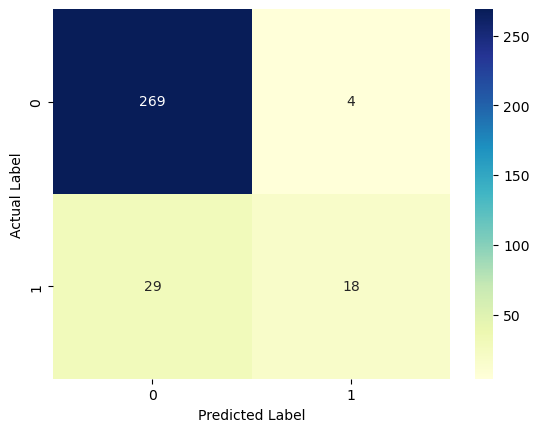

In [45]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.82      0.38      0.52        47

    accuracy                           0.90       320
   macro avg       0.86      0.68      0.73       320
weighted avg       0.89      0.90      0.88       320

